In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Exploratory data analysis

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

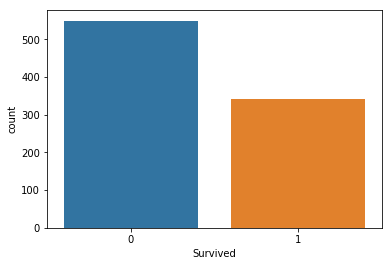

In [6]:
sns.countplot(train['Survived'])

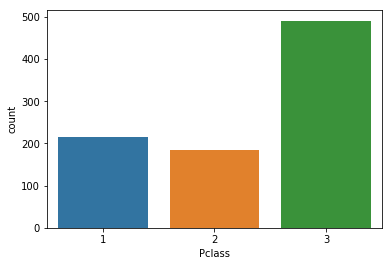

In [7]:
sns.countplot(train['Pclass'])

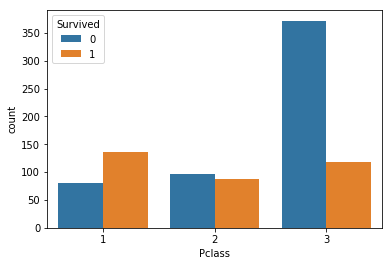

In [8]:
sns.countplot(train['Pclass'], hue=train['Survived'])

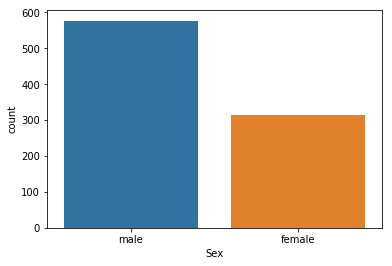

In [9]:
sns.countplot(train['Sex'])

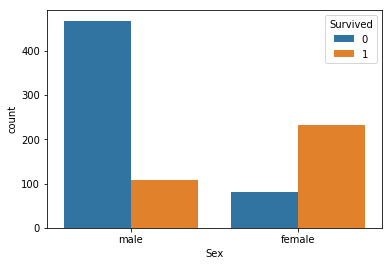

In [10]:
sns.countplot(train['Sex'], hue=train['Survived'])

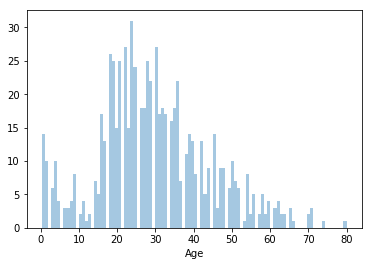

In [11]:
sns.distplot(train['Age'].dropna(), kde=False, bins=100)

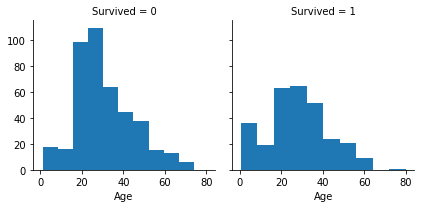

In [12]:
age = train[['Age', 'Survived']].dropna()
g = sns.FacetGrid(age, col='Survived')
g = g.map(plt.hist, 'Age')

In [13]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

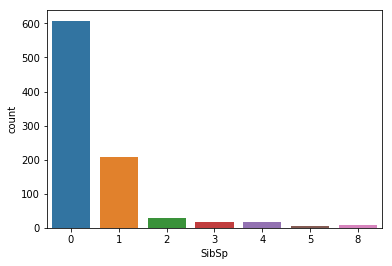

In [14]:
sns.countplot(train['SibSp'])

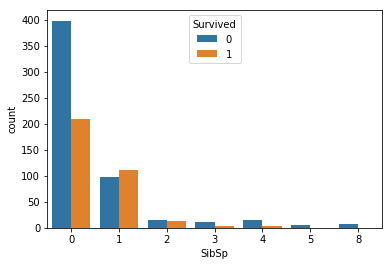

In [15]:
sns.countplot(train['SibSp'], hue=train['Survived'])

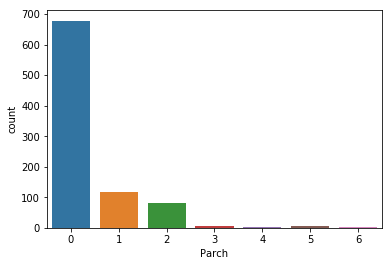

In [16]:
sns.countplot(train['Parch'])

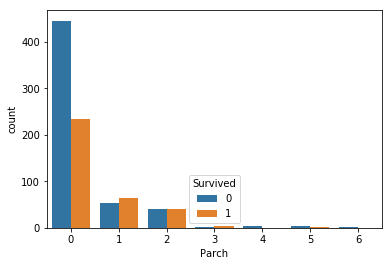

In [17]:
sns.countplot(train['Parch'], hue=train['Survived'])

In [18]:
train['Ticket'].nunique()

681

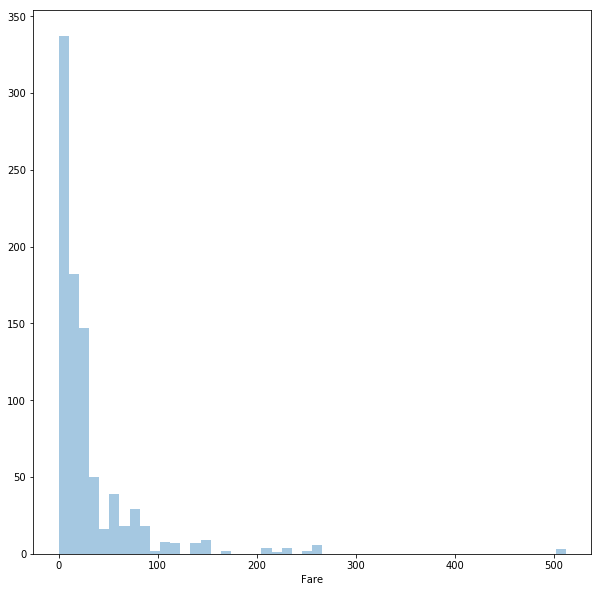

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(train['Fare'], kde=False)

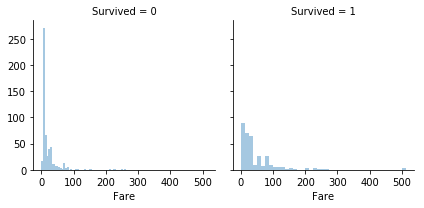

In [20]:
age = train[['Fare', 'Survived']].dropna()
g = sns.FacetGrid(age, col='Survived')
g = g.map(sns.distplot, 'Fare', kde=False)

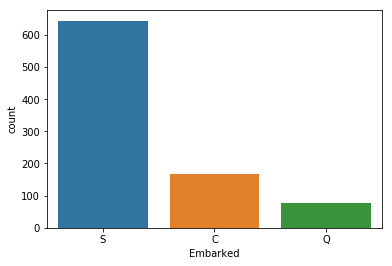

In [21]:
sns.countplot(train['Embarked'])

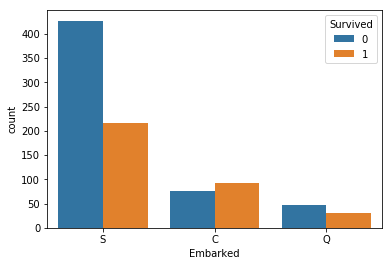

In [22]:
sns.countplot(train['Embarked'], hue=train['Survived'])

# Analyze missing values

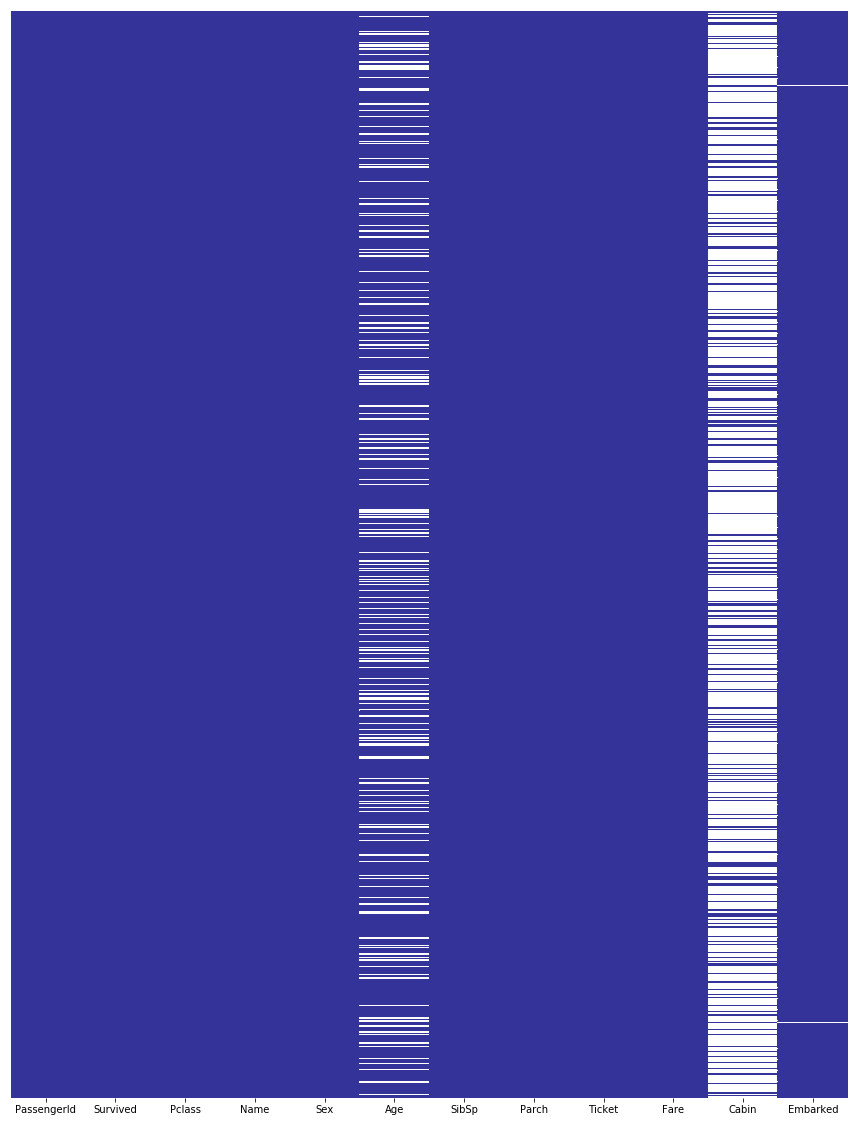

In [23]:
plt.figure(figsize=(15, 20))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='terrain')

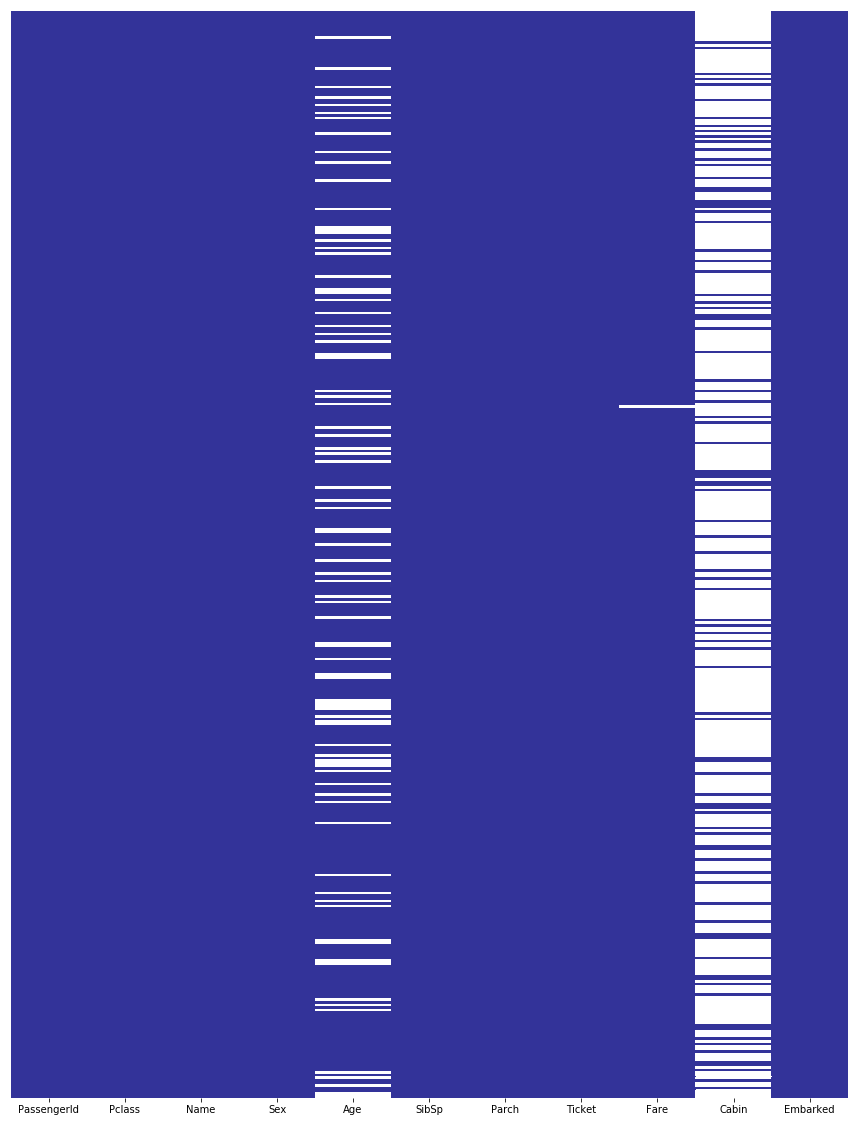

In [24]:
plt.figure(figsize=(15, 20))
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='terrain')

In [25]:
# we can drop records from training set that have null values, but not from testing set, so handling individually
train = train[train['Embarked'].notnull()]

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
# cabin is missing too many values to impute, we can simply delete it later (after combining with test set)
# age can be imputed, but it is missing value in testing set as well, so combine both sets before processing

# Combine data from preprocessing

In [28]:
# add additional attribute so we can separate two datasets later
train['dataset'] = 'train'
test['dataset'] = 'test'
data = pd.concat([train, test])
data.sample(5)

Age Cabin Embarked     Fare                       Name  Parch  \
865  42.0   NaN        S  13.0000   Bystrom, Mrs. (Karolina)      0   
160  44.0   NaN        S  16.1000   Cribb, Mr. John Hatfield      1   
673  31.0   NaN        S  13.0000      Wilhelms, Mr. Charles      0   
772  57.0   E77        S  10.5000          Mack, Mrs. (Mary)      0   
512  36.0   E25        S  26.2875  McGough, Mr. James Robert      0   

     PassengerId  Pclass     Sex  SibSp  Survived       Ticket dataset  
865          866       2  female      0       1.0       236852   train  
160          161       3    male      0       0.0       371362   train  
673          674       2    male      0       1.0       244270   train  
772          773       2  female      0       0.0  S.O./P.P. 3   train  
512          513       1    male      0       1.0     PC 17473   train

In [29]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dataset           0
dtype: int64

# Extract last names from Name

In [30]:
data['LastName'] = data['Name'].apply(lambda x: x.split(',')[0].strip())

In [31]:
pd.pivot_table(data[['LastName', 'Survived']], index=['LastName'], columns=['Survived'], aggfunc=np.count_nonzero)

Survived          0.0  1.0
LastName                  
Abbing            1.0  NaN
Abbott            1.0  2.0
Abelson           1.0  2.0
Adahl             1.0  NaN
Adams             1.0  NaN
Ahlin             1.0  NaN
Aks               NaN  2.0
Albimona          NaN  2.0
Alexander         1.0  NaN
Alhomaki          1.0  NaN
Ali               2.0  NaN
Allen             1.0  2.0
Allison           2.0  2.0
Allum             1.0  NaN
Andersen-Jensen   NaN  2.0
Anderson          NaN  2.0
Andersson         7.0  4.0
Andreasson        1.0  NaN
Andrew            1.0  NaN
Andrews           1.0  2.0
Angle             NaN  2.0
Appleton          NaN  2.0
Arnold-Franchi    2.0  NaN
Artagaveytia      1.0  NaN
Asim              1.0  NaN
Asplund           1.0  6.0
Astor             NaN  2.0
Attalah           2.0  NaN
Aubart            NaN  2.0
Augustsson        1.0  NaN
...               ...  ...
Wells             NaN  2.0
West              1.0  4.0
Wheadon           1.0  NaN
White             2.0  NaN
Wick              NaN  4.0
Widegren          1.0  NaN
Widener           1.0  NaN
Wiklund           1.0  NaN
Wilhelms          NaN  2.0
Willey            1.0  NaN
Williams          3.0  2.0
Williams-Lambert  1.0  NaN
Windelov          1.0  NaN
Wiseman           1.0  NaN
Woolner           NaN  2.0
Wright            1.0  NaN
Yasbeck           1.0  2.0
Young             NaN  2.0
Youseff           1.0  NaN
Yousif            1.0  NaN
Yousseff          1.0  NaN
Yrois             1.0  NaN
Zabour            2.0  NaN
Zimmerman         1.0  NaN
de Messemaeker    NaN  2.0
de Mulder         NaN  2.0
de Pelsmaeker     1.0  NaN
del Carlo         1.0  NaN
van Billiard      1.0  NaN
van Melkebeke     1.0  NaN

[665 rows x 2 columns]

# Extract titles from names

In [32]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data.drop('Name', axis=1, inplace=True)

In [33]:
data.sample(5)

Age Cabin Embarked     Fare  Parch  PassengerId  Pclass     Sex  SibSp  \
173   NaN   NaN        C   7.2292      0         1065       3    male      0   
290  26.0   NaN        S  78.8500      0          291       1  female      0   
736  48.0   NaN        S  34.3750      3          737       3  female      1   
776   NaN   F38        Q   7.7500      0          777       3    male      0   
319  22.0   NaN        S  31.5000      0         1211       2    male      2   

     Survived      Ticket dataset  LastName Title  
173       NaN        2673    test     Torfa    Mr  
290       1.0       19877   train    Barber  Miss  
736       0.0  W./C. 6608   train      Ford   Mrs  
776       0.0      383121   train     Tobin    Mr  
319       NaN  C.A. 31029    test  Jefferys    Mr

In [34]:
title_freq = data['Title'].value_counts()
data['Title'] = data['Title'].apply(lambda x: x if title_freq[x] > 5 else 'Other')

In [35]:
data['entry'] = 1
pd.pivot_table(data, values='entry', index='Title', columns='Survived', aggfunc=np.sum)

Survived    0.0    1.0
Title                 
Dr          4.0    3.0
Master     17.0   23.0
Miss       55.0  126.0
Mr        436.0   81.0
Mrs        26.0   98.0
Other       5.0    9.0
Rev         6.0    NaN

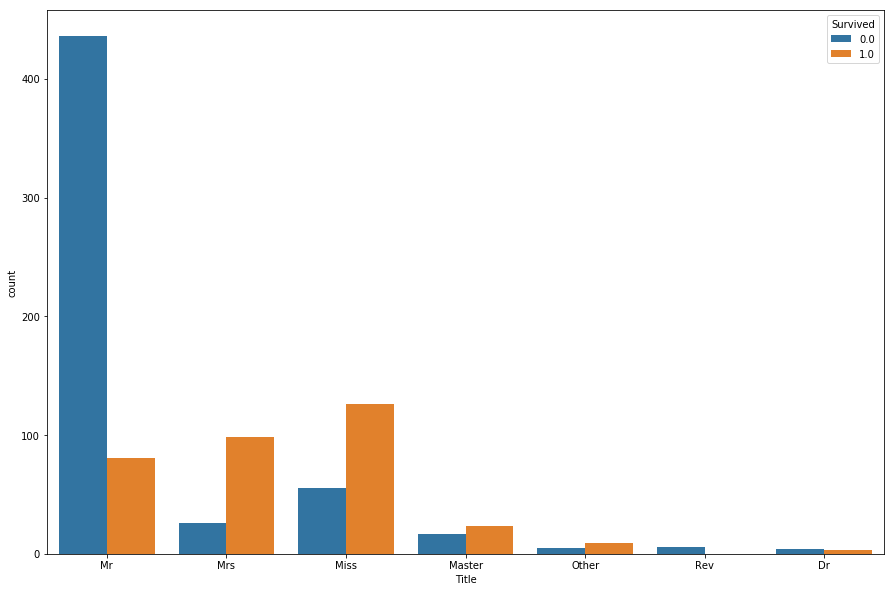

In [36]:
plt.figure(figsize=(15, 10))
sns.countplot(data['Title'], hue=data['Survived'])

# Check if age is co-related with any other parameters

In [37]:
age = train[train['Age'].notnull()]

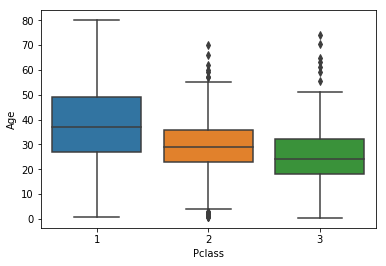

In [38]:
sns.boxplot(x='Pclass', y='Age', data=age)

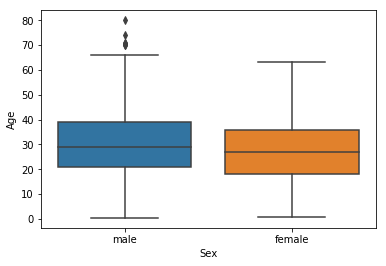

In [39]:
sns.boxplot(x='Sex', y='Age', data=age)

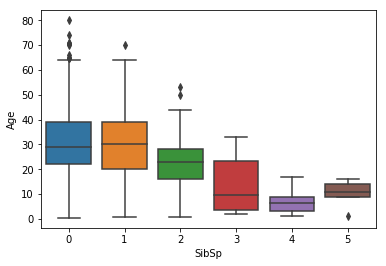

In [40]:
sns.boxplot(x='SibSp', y='Age', data=age)

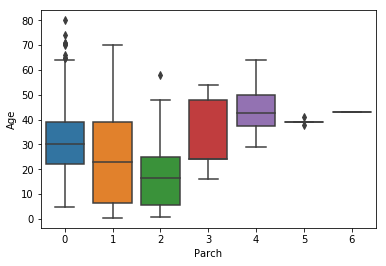

In [41]:
sns.boxplot(x='Parch', y='Age', data=age)

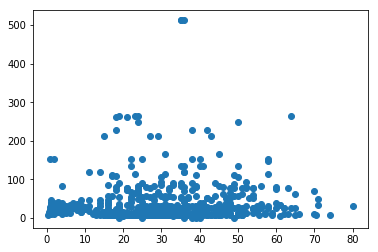

In [42]:
plt.scatter(age['Age'], age['Fare'])

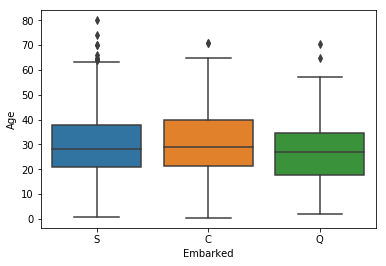

In [43]:
sns.boxplot(x='Embarked', y='Age', data=age)

In [44]:
data.groupby('Title')['Age'].agg(['count', 'mean'])

count       mean
Title                   
Dr          7  43.571429
Master     53   5.482642
Miss      209  21.696603
Mr        581  32.252151
Mrs       169  36.846154
Other      17  42.941176
Rev         8  41.250000

In [45]:
data.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])

count       mean
Title  Pclass                  
Dr     1           5  45.600000
       2           2  38.500000
Master 1           5   6.984000
       2          11   2.757273
       3          37   6.090000
Miss   1          58  30.206897
       2          48  20.717083
       3         103  17.360874
Mr     1         132  41.450758
       2         137  32.346715
       3         312  28.318910
Mrs    1          66  42.924242
       2          54  33.518519
       3          49  32.326531
Other  1          16  43.875000
       2           1  28.000000
       3           0        NaN
Rev    2           8  41.250000

In [46]:
# Impute missing age values using Pclass
# avg_age_by_class = data.groupby('Pclass')['Age'].mean()
# avg_age_by_class

# null_age = data['Age'].isnull()
# data.loc[null_age, 'Age'] = data[null_age]['Pclass'].apply(lambda x: avg_age_by_class[x])

In [47]:
# Impute missing age value using title
avg_age_by_title = data.groupby('Title')['Age'].mean()

null_age = data['Age'].isnull()
data.loc[null_age, 'Age'] = data[null_age]['Title'].apply(lambda x: avg_age_by_title[x])

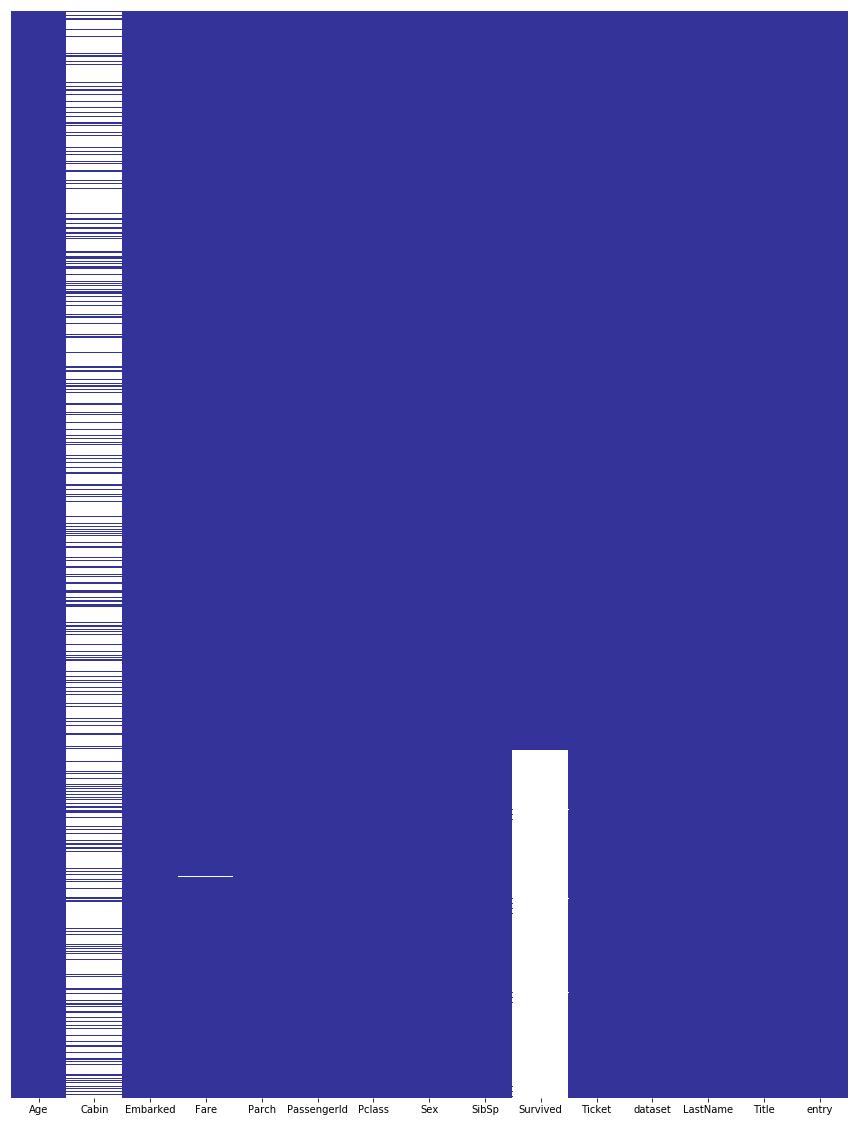

In [48]:
plt.figure(figsize=(15, 20))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='terrain')

In [49]:
# drop useless columns
data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [50]:
data.isnull().sum()

Age              0
Embarked         0
Fare             1
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dataset          0
LastName         0
Title            0
entry            0
dtype: int64

In [51]:
# fill missing values in testing set
data[data['Fare'].isnull()]

Age Embarked  Fare  Parch  PassengerId  Pclass   Sex  SibSp  Survived  \
152  60.5        S   NaN      0         1044       3  male      0       NaN   

    dataset LastName Title  entry  
152    test   Storey    Mr      1

In [52]:
data.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [53]:
data.loc[data['Fare'].isnull(), 'Fare'] = 14.644083

In [54]:
data.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dataset          0
LastName         0
Title            0
entry            0
dtype: int64

# Convert categorical features into dummy variables

In [55]:
for col_name in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'LastName']:
    col = pd.get_dummies(data[col_name], drop_first=True, prefix=col_name)
    data = pd.concat([data, col], axis=1)
    data.drop(col_name, axis=1, inplace=True)

In [56]:
data.head()

Age     Fare  PassengerId  Survived dataset  entry  Pclass_2  Pclass_3  \
0  22.0   7.2500            1       0.0   train      1         0         1   
1  38.0  71.2833            2       1.0   train      1         0         0   
2  26.0   7.9250            3       1.0   train      1         0         1   
3  35.0  53.1000            4       1.0   train      1         0         0   
4  35.0   8.0500            5       0.0   train      1         0         1   

   Sex_male  SibSp_1           ...            LastName_Zabour  \
0         1        1           ...                          0   
1         0        1           ...                          0   
2         0        0           ...                          0   
3         0        1           ...                          0   
4         1        0           ...                          0   

   LastName_Zakarian  LastName_Zimmerman  LastName_de Brito  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   LastName_de Messemaeker  LastName_de Mulder  LastName_de Pelsmaeker  \
0                        0                   0                       0   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   0                       0   

   LastName_del Carlo  LastName_van Billiard  LastName_van Melkebeke  
0                   0                      0                       0  
1                   0                      0                       0  
2                   0                      0                       0  
3                   0                      0                       0  
4                   0                      0                       0  

[5 rows x 902 columns]

In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
for col in ['Age', 'Fare']:
    scaled = scalar.fit_transform(data[[col]])
    data[col] = scaled

In [58]:
data.head()

Age      Fare  PassengerId  Survived dataset  entry  Pclass_2  \
0 -0.597593 -0.501842            1       0.0   train      1         0   
1  0.617099  0.736021            2       1.0   train      1         0   
2 -0.293920 -0.488793            3       1.0   train      1         0   
3  0.389344  0.384510            4       1.0   train      1         0   
4  0.389344 -0.486377            5       0.0   train      1         0   

   Pclass_3  Sex_male  SibSp_1           ...            LastName_Zabour  \
0         1         1        1           ...                          0   
1         0         0        1           ...                          0   
2         1         0        0           ...                          0   
3         0         0        1           ...                          0   
4         1         1        0           ...                          0   

   LastName_Zakarian  LastName_Zimmerman  LastName_de Brito  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   LastName_de Messemaeker  LastName_de Mulder  LastName_de Pelsmaeker  \
0                        0                   0                       0   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   0                       0   

   LastName_del Carlo  LastName_van Billiard  LastName_van Melkebeke  
0                   0                      0                       0  
1                   0                      0                       0  
2                   0                      0                       0  
3                   0                      0                       0  
4                   0                      0                       0  

[5 rows x 902 columns]

In [59]:
X = data[data['dataset']=='train'].drop(['PassengerId', 'Survived', 'dataset'], axis=1)
y = data[data['dataset']=='train']['Survived']
y_onehot = np.eye(2)[y.astype(np.int32)].astype(int)
y_onehot

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.33, random_state=42)

In [61]:
num_featuers = X.shape[1]
num_featuers

899

# Using neural network

In [62]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [64]:
model = Sequential(name='mlp')

# model.add(ll.InputLayer(input_shape=[num_featuers]))

model.add(Dense(1000, input_shape=[num_featuers], kernel_initializer='normal', activation='relu', kernel_regularizer=l2()))
model.add(Dropout(0.2))
model.add(Dense(500, kernel_initializer='normal', activation='relu', kernel_regularizer=l2()))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu', kernel_regularizer=l2()))
model.add(Dropout(0.1))
model.add(Dense(2, kernel_initializer='normal', activation='softmax', kernel_regularizer=l2()))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.compile(optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
#               loss=keras.losses.binary_crossentropy,
#               metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              900000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total para

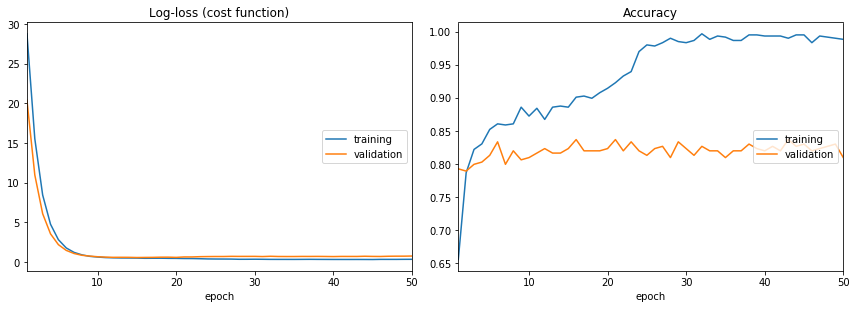

294/294 [==============================] - 0s 240us/step


'loss, accuracy = [0.7514786979779094, 0.8095238091183358]'

In [66]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0,
         callbacks=[PlotLossesKeras()])
'loss, accuracy = {}'.format(model.evaluate(X_val, y_val))

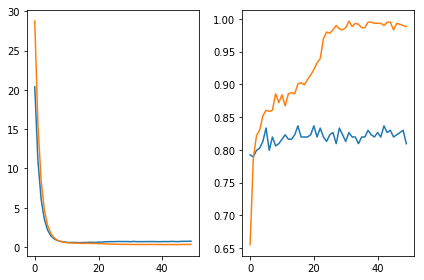

In [67]:
plt.subplot(121)
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])

plt.subplot(122)
plt.plot(model.history.history['val_acc'])
plt.plot(model.history.history['acc'])

plt.tight_layout()

In [68]:
# fit again using all training data for better accuracy
model.fit(X, y_onehot, epochs=50, verbose=0)
'loss, accuracy = {}'.format(model.evaluate(X_val, y_val))

294/294 [==============================] - 0s 271us/step


'loss, accuracy = [0.3472774553866613, 0.9795918367346939]'

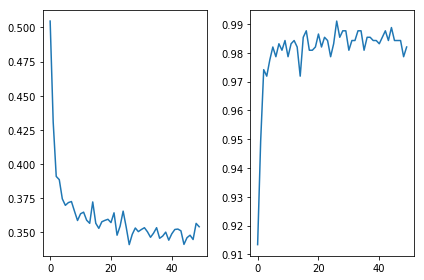

In [69]:
plt.subplot(121)
plt.plot(model.history.history['loss'])

plt.subplot(122)
plt.plot(model.history.history['acc'])

plt.tight_layout()

In [70]:
predictions = model.predict(X_val)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(confusion_matrix(y_val.argmax(axis=1), predictions.argmax(axis=1)))

[[184   0]
 [  6 104]]


In [73]:
print(classification_report(y_val.argmax(axis=1), predictions.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       184
          1       1.00      0.95      0.97       110

avg / total       0.98      0.98      0.98       294



# Get predictions for test data

In [74]:
X_test = data[data['dataset']=='test'].drop(['PassengerId', 'Survived', 'dataset'], axis=1)

In [75]:
predictions = model.predict_classes(X_test)
predictions = np.squeeze(predictions)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
submission = pd.DataFrame({
    'PassengerId': data[data['dataset']=='test']['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [77]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1